<a href="https://colab.research.google.com/github/soundernarayanasamy/Machine-Learning/blob/main/%20%20Customer%20Spending%20analysis%20using%20HIERARCHICAL%20CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
upload = files.upload()

Saving dataset.csv to dataset (1).csv


In [6]:
data = pd.read_csv('dataset.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


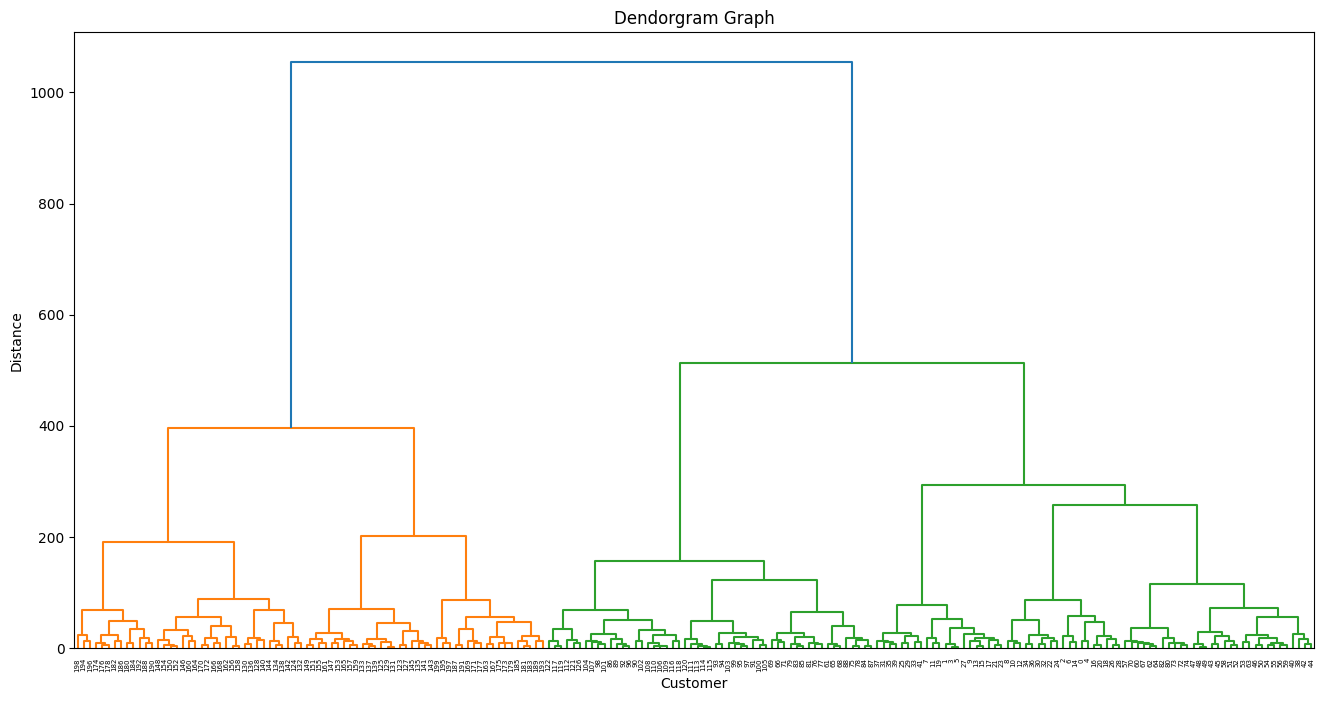

In [23]:
import scipy.cluster.hierarchy as clus
plt.figure(1, figsize=(16,8))
dendrogram = clus.dendrogram(clus.linkage(data, method='ward'))

plt.title('Dendorgram Graph')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
y_means = model.fit_predict(data)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

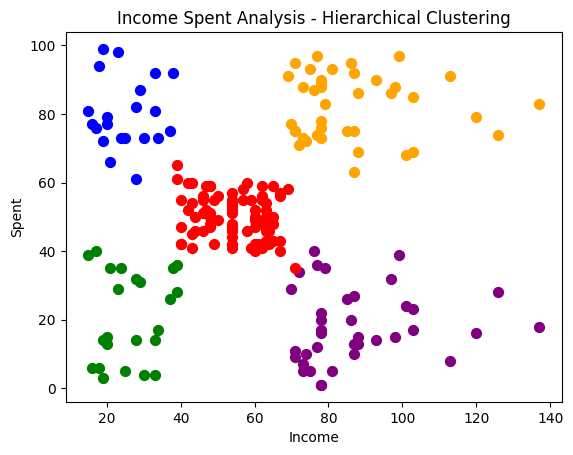

In [33]:
x = data.iloc[:, [3,4]].values
plt.scatter (x[y_means==0, 0], x[y_means==0, 1], s=50, c='purple', label='Cluster 1')
plt.scatter(x[y_means==1, 0], x[y_means==1, 1], s=50, c='orange', label='Cluster 2')
plt.scatter(x[y_means==2, 0], x[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter (x[y_means==3, 0], x[y_means==3, 1], s=50, c='green', label='Cluster 4')
plt.scatter(x[y_means==4, 0], x[y_means==4, 1], s=50, c='blue', label='Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()